In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
property_df = pd.read_csv('property locations.csv')

In [3]:
property_df.columns

Index(['Market', 'Owner/Operator, Franchise', 'ADDRESS', 'CTY', 'ST', 'Zip',
       'Area', 'Year'],
      dtype='object')

In [4]:
property_df.rename(columns={'Market':'market',
                            'Owner/Operator, Franchise':'owner',
                            'ADDRESS':'address',
                            'CTY':'city',
                            'ST':'state',
                            'Zip':'zip',
                            'Area':'storage_area',
                            'Year':'year'}, inplace=True)

In [5]:
property_df.head()

,market,owner,address,city,state,zip,storage_area,year
0,Albuquerque,Extra Space Storage,1522 Pacheco Street,Santa Fe,NM,87505,73934.0,2000.0
1,Albuquerque,Extra Space Storage,1909 Golf Course Road SE,Rio Rancho,NM,87124,72836.0,2000.0
2,Albuquerque,Extra Space Storage,3300 Calle Cuervo NW,Albuquerque,NM,87114,80889.0,1998.0
3,Albuquerque,Extra Space Storage,9831 Montgomery Blvd NE,Albuquerque,NM,87111,62697.0,1997.0
4,Albuquerque,Extra Space Storage,9221 Eagle Ranch Road NW,Albuquerque,NM,87114,60821.0,1998.0


Checking if there is any null value present in dataset

In [6]:
# Check for missing values
property_df.isnull().sum()

market           0
owner            0
address          0
city             0
state            0
zip              0
storage_area     4
year            76
dtype: int64

This mean we have 4 rows where "Area" value is null

In [7]:
property_df[property_df['storage_area'].isnull()]

,market,owner,address,city,state,zip,storage_area,year
1506,New Jersey - Northern,CubeSmart Self Storage,110 Pleasant Avenue,Upper Saddle River,NJ,7458,NaN,NaN
1734,Baltimore,EZ Storage Phase II,1450 Taylor Avenue,Parkville,MD,21234,NaN,NaN
1783,Baltimore,EZ Storage Phase II,1450 Taylor Avenue,Parkville,MD,21234,NaN,NaN
4128,Seattle,Public Storage Phase II,1800 124th Avenue NE,Bellevue,WA,98005,NaN,NaN


In [8]:
#dropping the row containg 
property_df.dropna(inplace=True)

In [9]:
property_df.describe()

,zip,storage_area,year
count,4355.000000,4355.000000,4355.000000
mean,53463.004363,83487.431458,1993.258553
std,30472.039855,36525.974630,13.076863
min,1020.000000,5000.000000,1900.000000
25%,29407.000000,59529.000000,1985.000000
50%,50023.000000,77469.000000,1994.000000
75%,80910.000000,98124.000000,2002.000000
max,98685.000000,398279.000000,2021.000000


In [10]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4355 entries, 0 to 4430
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        4355 non-null   object 
 1   owner         4355 non-null   object 
 2   address       4355 non-null   object 
 3   city          4355 non-null   object 
 4   state         4355 non-null   object 
 5   zip           4355 non-null   int64  
 6   storage_area  4355 non-null   float64
 7   year          4355 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 306.2+ KB


In [11]:
property_df['year'] = property_df['year'].astype(int)

In [12]:
property_df.size

34840

In [13]:
df = property_df

In [14]:
df.columns

Index(['market', 'owner', 'address', 'city', 'state', 'zip', 'storage_area',
       'year'],
      dtype='object')

### Analysis of self-storage property over year

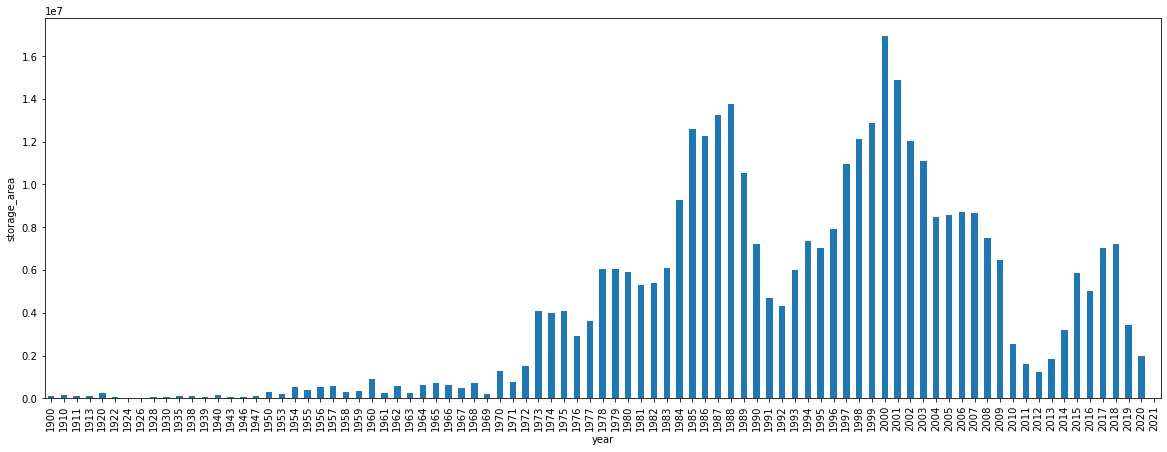

In [17]:
fig= plt.figure(figsize=(20,7))
data = df.groupby(['year']).storage_area.sum().plot(kind='bar',ylabel='storage_area')
plt.show()

### Analysis of self-storage property over state

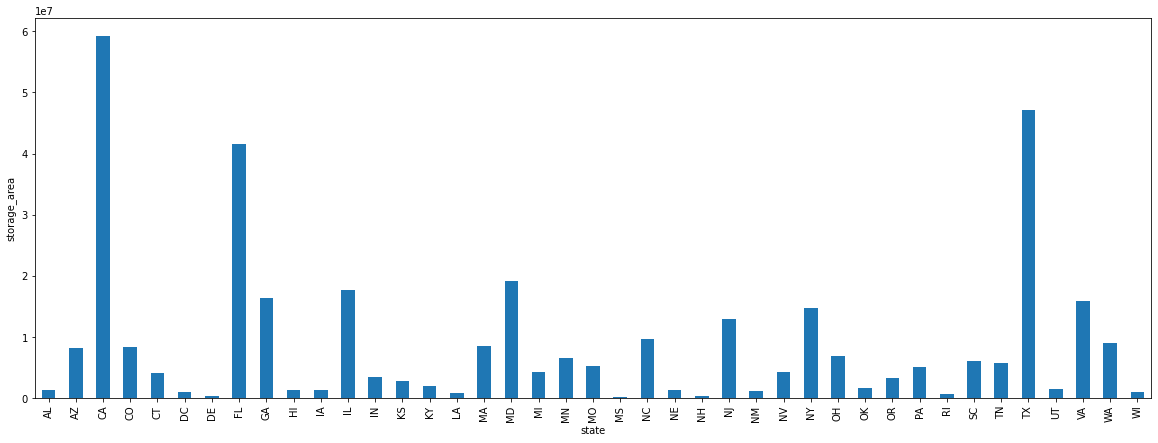

In [18]:
fig= plt.figure(figsize=(20,7))
data = df.groupby(['state']).storage_area.sum().plot(kind='bar',ylabel='storage_area')
plt.show()

Above graph shows that maximum self-storage area are observed in California and Texas state

### Analysis of self-storage property distribution in California

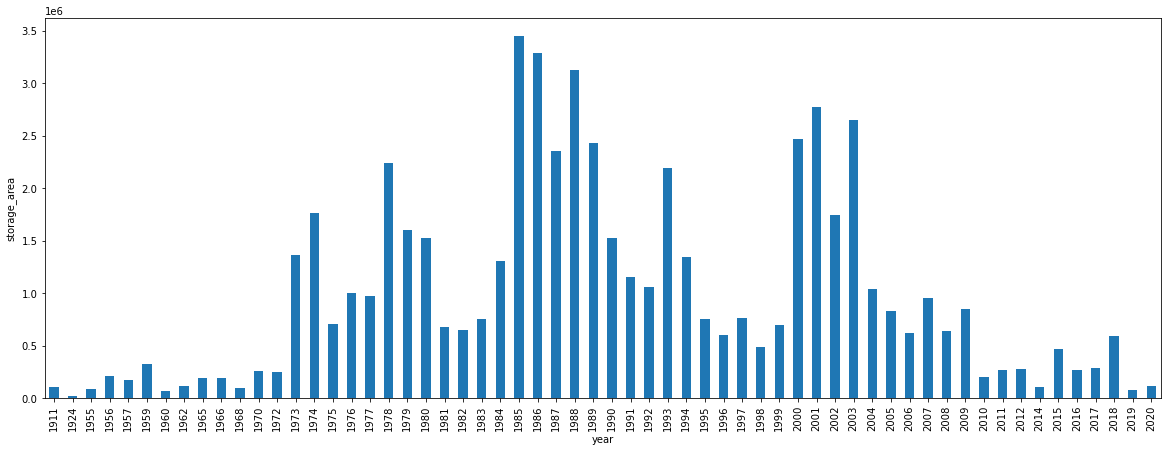

In [23]:
fig= plt.figure(figsize=(20,7))
data = df[df['state'] == 'CA'].groupby('year').storage_area.sum().plot(kind='bar',ylabel='storage_area')
#plt.xticks(np.arange(1900, 2021, 2))
plt.show()

In past few years self_storage area in california is decreased drastically 

### Analysis of self-storage property distribution in Texas

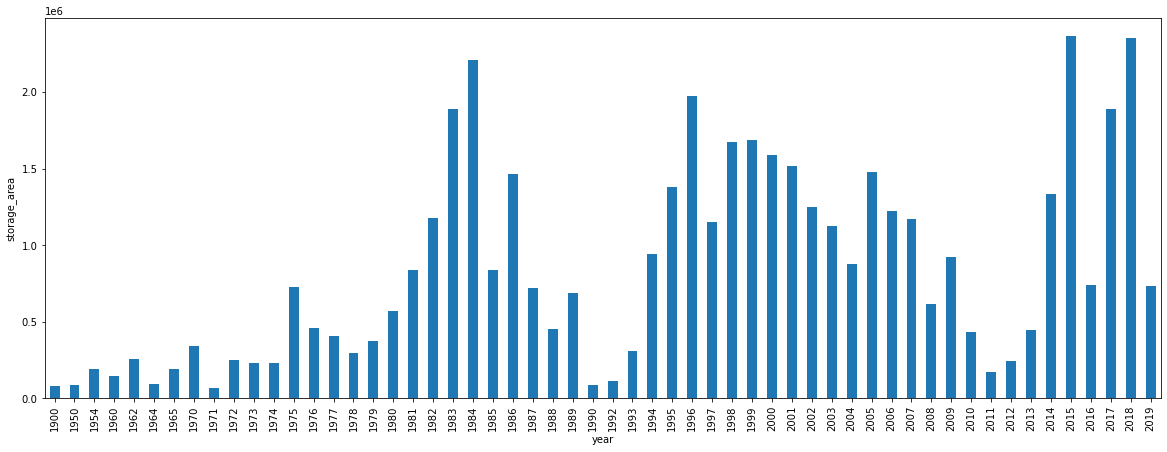

In [24]:
fig= plt.figure(figsize=(20,7))
data = df[df['state'] == 'TX'].groupby('year').storage_area.sum().plot(kind='bar',ylabel='storage_area')
plt.show()

In past few years self_storage area in Texas is increased  

### Checking top 5 states storage_area wise for year 2019 - 2015

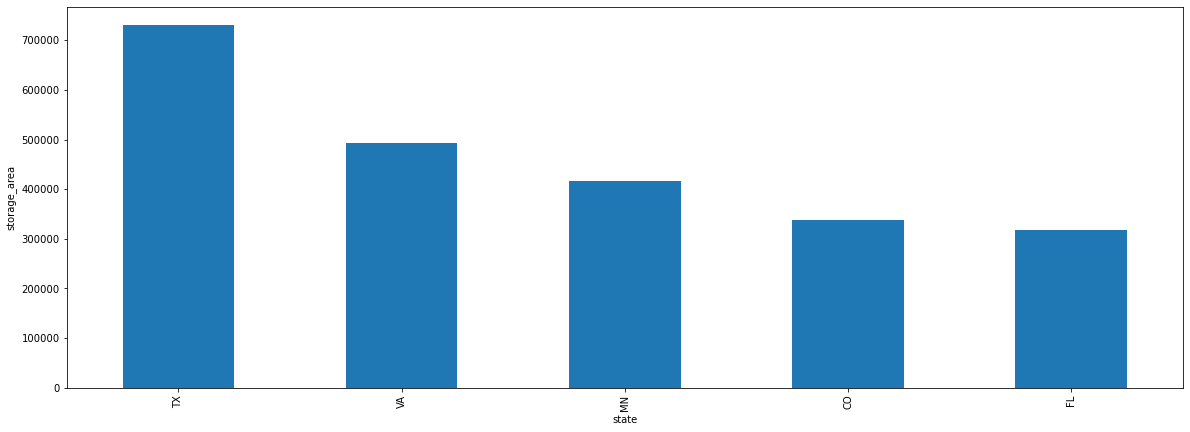

In [41]:
fig= plt.figure(figsize=(20,7))
data = df[df['year'] == 2019].groupby('state').storage_area.sum().\
    sort_values(ascending=False).head().plot(kind='bar',ylabel='storage_area')
plt.show()

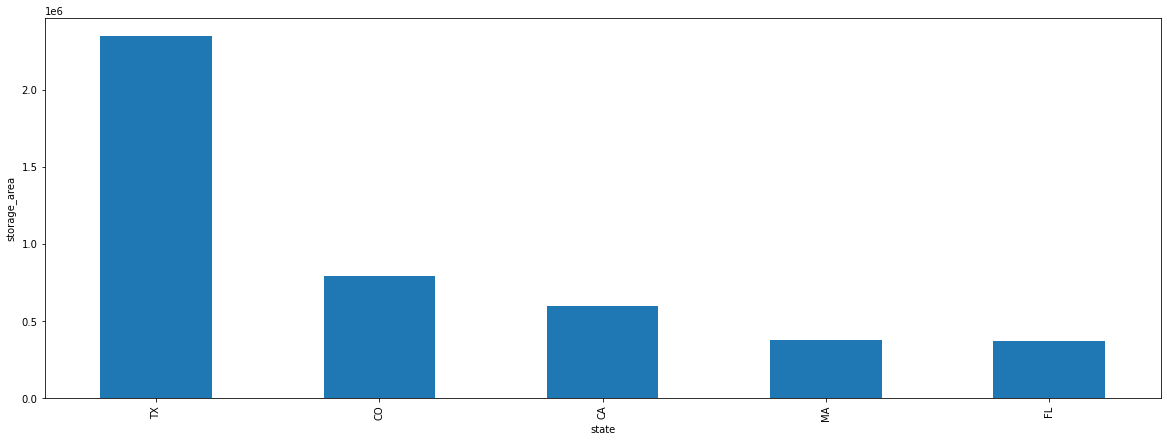

In [40]:
fig= plt.figure(figsize=(20,7))
data = df[df['year'] == 2018].groupby('state').storage_area.sum().\
        sort_values(ascending=False).head().plot(kind='bar',ylabel='storage_area')
plt.show()

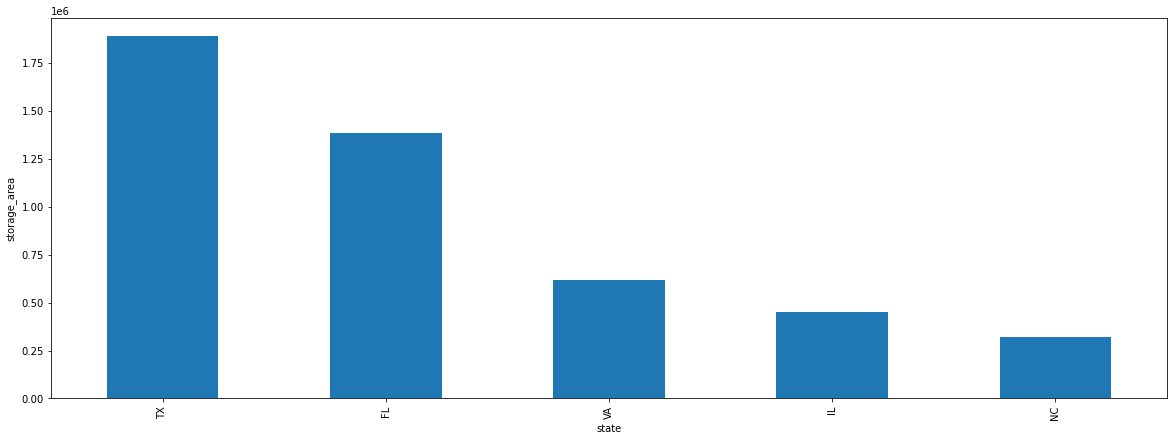

In [42]:
fig= plt.figure(figsize=(20,7))
data = df[df['year'] == 2017].groupby('state').storage_area.sum().\
        sort_values(ascending=False).head().plot(kind='bar',ylabel='storage_area')
plt.show()

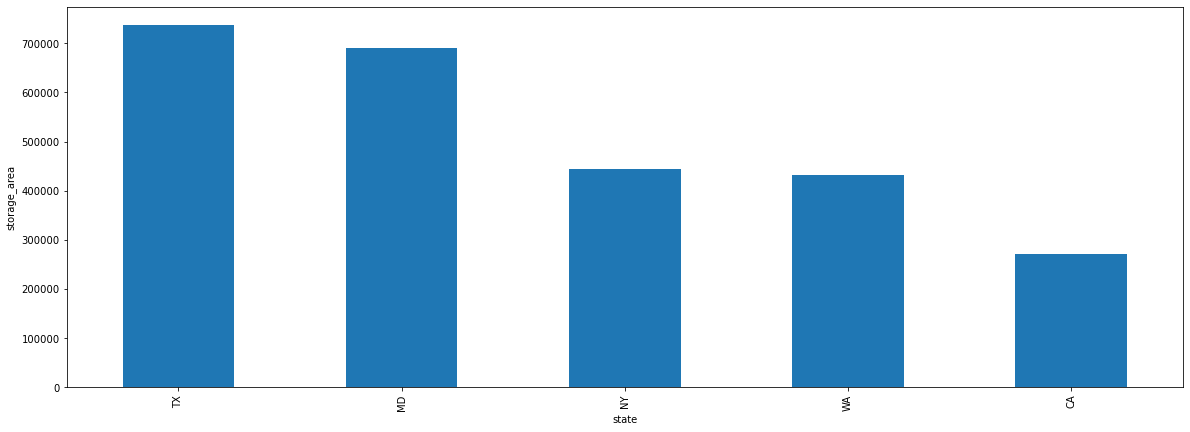

In [43]:
fig= plt.figure(figsize=(20,7))
data = df[df['year'] == 2016].groupby('state').storage_area.sum().\
        sort_values(ascending=False).head().plot(kind='bar',ylabel='storage_area')
plt.show()

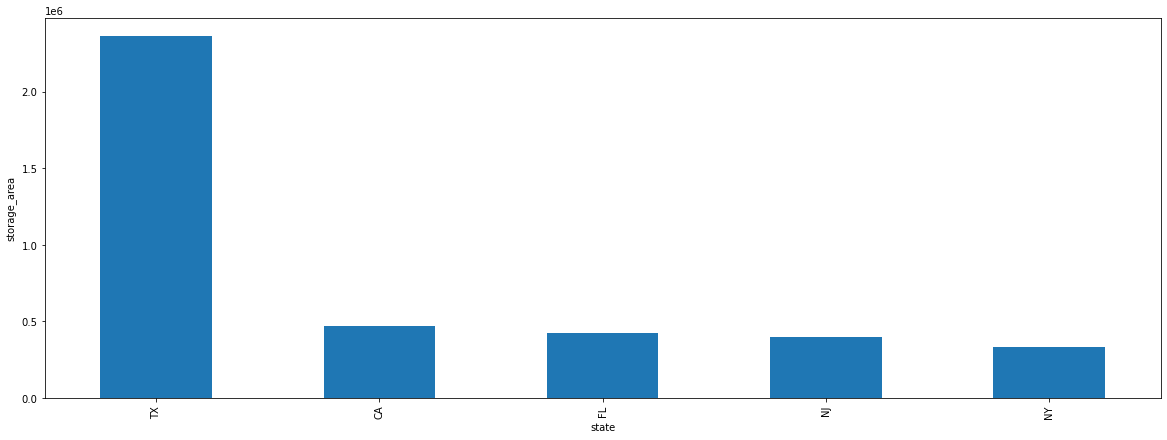

In [44]:
fig= plt.figure(figsize=(20,7))
data = df[df['year'] == 2015].groupby('state').storage_area.sum().\
        sort_values(ascending=False).head().plot(kind='bar',ylabel='storage_area')
plt.show()

From above bar graph we can say that over past 5 years self-storage area in Texas increasing and and California, CO , VA, FL and NY, NJ are among popular state for self-storage investment